In [1]:
#Import The Necessary Package on Python
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Preprocessing Package Import
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import StandardScaler

#Metric Evaluation Package Import
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix, roc_auc_score, f1_score
from sklearn import metrics

#Modelling Package Import
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [3]:
#Using the PyDrive to import dataframe on GoogleDrive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':'1t_JeCeGUM4zt28H6luVEJ813XBraVyy0'})
downloaded.GetContentFile('cardio_train.csv')

In [4]:
#Named raw Dataframe into one variable
df = pd.read_csv('cardio_train.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [5]:
df_copy = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
#Check the duplicated value on dataframe
df_copy['id'].duplicated().sum()

0

In [7]:
#Check the Missing value on dataframe
df_copy.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
#Need to change the column's name so the columns become easy to use but not confusing
New_Columns_Name = ['ID','Age','Gender','Height','Weight','Sys_Blood_Press','Dias_Blood_Press','Cholesterol',
                    'Glucose','Smoking','Alcoholic','Physical_Activity','Cardio_Diagnose']


df_copy = df_copy.set_axis(New_Columns_Name, axis='columns', inplace=False)
df_copy

,ID,Age,Gender,Height,Weight,Sys_Blood_Press,Dias_Blood_Press,Cholesterol,Glucose,Smoking,Alcoholic,Physical_Activity,Cardio_Diagnose
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Text(0.5, 0, 'Cardio_Diagnose')

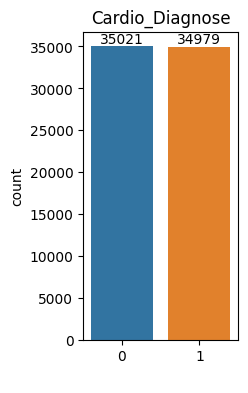

In [12]:
#Get the count on PD_Diagnose how much on 0 and 1
plt.figure(figsize=(2,4))
axi = sns.countplot(data=df_copy, x=df_copy['Cardio_Diagnose'])
axi.bar_label(axi.containers[0])
plt.title('Cardio_Diagnose', loc='Center')
plt.xlabel('Cardio_Diagnose', color='w')

In [13]:
#Make the Variables with the contains is named of columns based on value
#Numerical or Categorical
nums = ['Age','Height','Weight','Sys_Blood_Press','Dias_Blood_Press']
cats = ['Gender','Cholesterol','Glucose','Smoking','Alcoholic','Physical_Activity','Cardio_Diagnose']

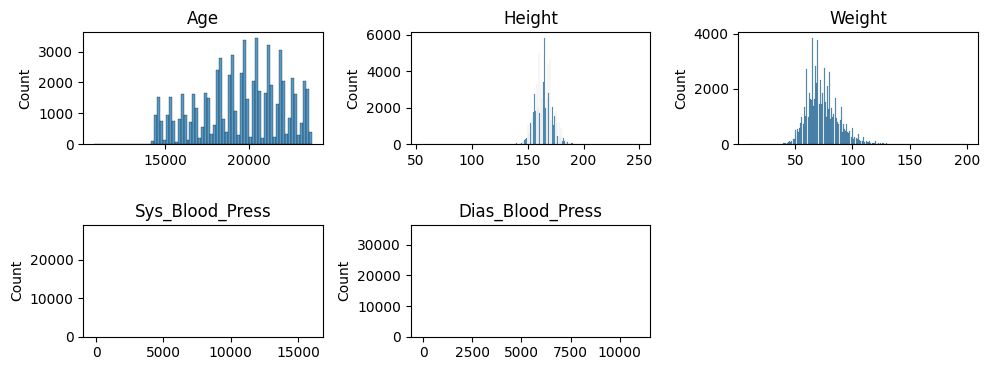

In [14]:
#Show the Histogram on Numerical columns
plt.figure(figsize=(10,4))
for i in range (0, len(nums)):
    plt.subplot(2,3, i+1)
    sns.histplot(x=df_copy[nums[i]])
    plt.title(nums[i], loc='Center')
    plt.xlabel(nums[i], color='w')
    plt.tight_layout()

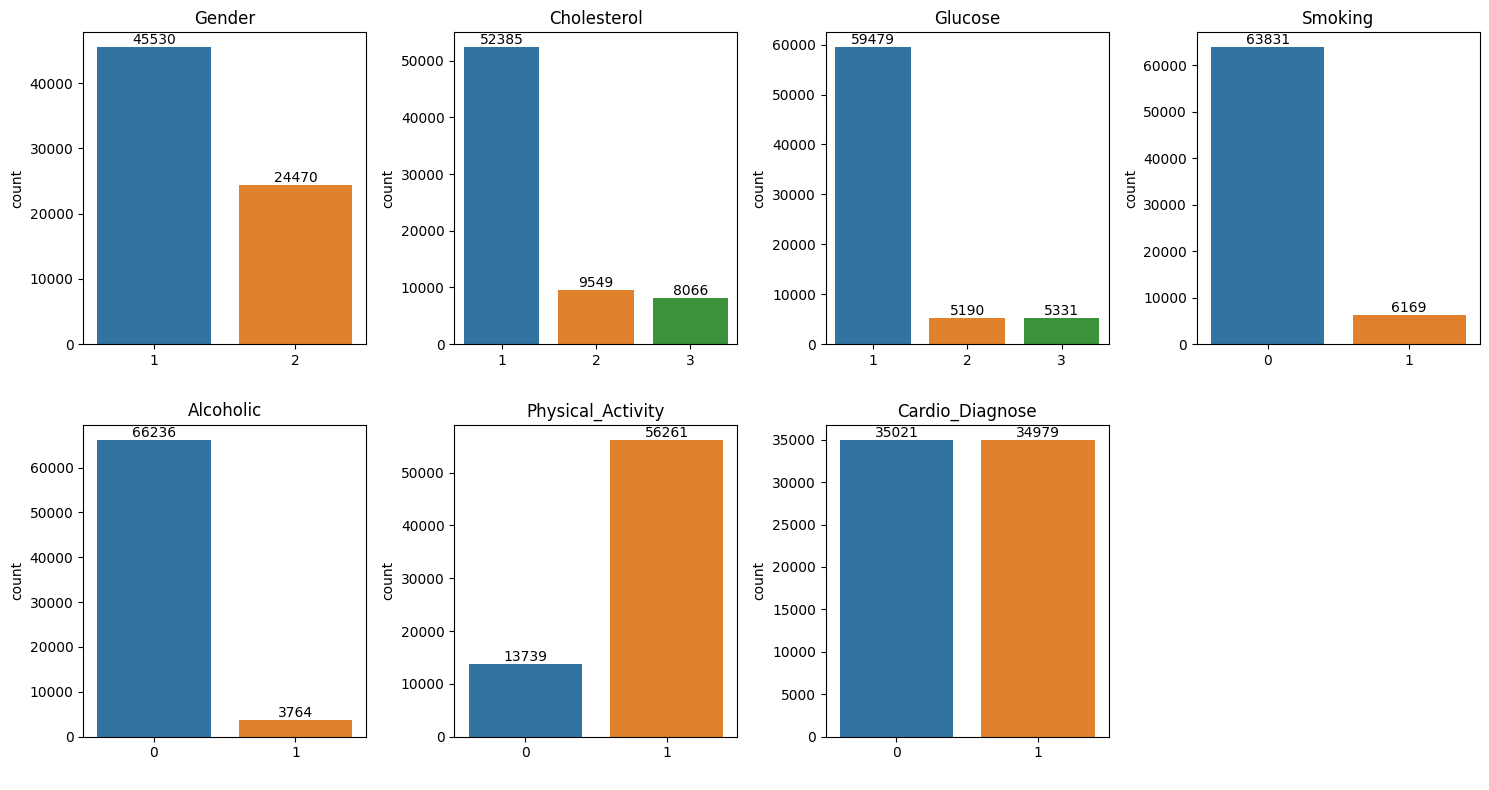

In [15]:
#Get the countplot on String (Categorical) columns to check distribution
plt.figure(figsize=(15,8))
for i in range (0, len(cats)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=df_copy[cats[i]])
    plt.title(cats[i], loc='Center')
    plt.xlabel(cats[i], color='w')
    plt.tight_layout()
    ax = sns.countplot(x=df_copy[cats[i]])
    ax.bar_label(ax.containers[0])

In [16]:
#Erase the negative sign on some value in Sys_Blood_Press column
#Do a delete negative sign because the Sys_Blood_Press is still have a rational value on positive condition

df_rev1 = df_copy.copy()
df_rev1['Sys_Blood_Press'] = df_rev1['Sys_Blood_Press'].replace([-100,-115,-100,-140,-120,-150,-120],
                                                                [100,115,100,140,120,150,120])

In [17]:
#Check the all of unique value inside Sys_Blood_Press column
df_rev1['Sys_Blood_Press'].unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
         909,   109,    85,   106,   129,    93,     7,    95,   179,
         156,   168,   132,   104,   103,   178,   175,   128,   151,
          15,   139, 11500,   127,    17,   108,   144,   102,     1,
        1420,    13,   143,   701,   107,   184,   149,   167,   114,
         101,    60,  1500,   181,   171,   202,   111,   907,    20,
         188,   185,   163,   173,   154,   177,   174, 14020,  1400,
         240,   191,   197,  1620,   152,    96,   199,  1130,   193,
          99,   196,

In [18]:
#Show the dataframe with criteria based on Sys_Blood_Press value higher than 400
df_rev1[df_rev1['Sys_Blood_Press'] > 400]

,ID,Age,Gender,Height,Weight,Sys_Blood_Press,Dias_Blood_Press,Cholesterol,Glucose,Smoking,Alcoholic,Physical_Activity,Cardio_Diagnose
1876,2654,15116,1,160,60.0,902,60,1,1,0,0,1,0
2014,2845,22712,2,167,59.0,906,0,1,1,0,0,1,0
4817,6822,14425,1,168,63.0,909,60,2,1,0,0,1,0
7763,11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
8915,12710,18870,1,164,75.0,1420,80,2,1,0,0,1,1
9557,13616,22659,1,155,87.0,701,110,1,1,0,0,1,1
13895,19827,15996,1,168,72.0,1500,80,1,1,0,0,1,1
17713,25314,22398,2,163,50.0,907,70,3,3,0,0,1,1
23867,34120,16131,1,161,92.0,906,0,2,1,0,0,1,1
25464,36339,15835,2,169,75.0,14020,80,2,1,0,0,1,1


In [19]:
#Pick just row with criteria based on Sys_Blood_Press value higher than 59 and lower than 400
df_rev1 = df_rev1[(df_rev1['Sys_Blood_Press'] > 59) & (df_rev1['Sys_Blood_Press'] < 400)].reset_index(drop = True)

In [20]:
#Check the all of unique value inside Dias_Blood_Press column
df_rev1['Dias_Blood_Press'].unique()

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    50,    30,   109,
          84,  1033,   150,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,    93,   105, 10000,    99,    77,    59,  8044,
         140,    92,  1044,   108,   125,   115,    68,    61,   106,
         102,    94,    66,    52,   170,    76,   160,    62,    96,
         130,   113,    67,  9100,    10,    88,   902,     8,   112,
         104,    71,    72,  1008,    98,    20,   802,  8000,  1022,
         850,   708,    57,   101,  9011,  1011,    64,     0,  1007,
        1177,  7100,    45,   709,  8500,    58,  1110,  8099,  1088,
         126,  1077,  1120,     7,   103,  1125,   180,   121,  8100,
         710,  5700,  8079,  1111,  1003,     6,  1900,   809,   114,
         801,  1002,    53,   111,     1,   118,    56,   182,   810,
           9,  7099,

In [21]:
#Show the dataframe with criteria based on Dias_Blood_Press value higher than 200
df_rev1[df_rev1['Dias_Blood_Press'] > 200]

,ID,Age,Gender,Height,Weight,Sys_Blood_Press,Dias_Blood_Press,Cholesterol,Glucose,Smoking,Alcoholic,Physical_Activity,Cardio_Diagnose
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69551,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1
69652,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1
69658,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1
69665,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0


In [22]:
#Pick just row with criteria based on Dias_Blood_Press value higher than 0 and lower than 200
df_rev1 = df_rev1[(df_rev1['Dias_Blood_Press'] != 0) & (df_rev1['Dias_Blood_Press'] < 200)].reset_index(drop = True)

In [23]:
df_rev1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68817 entries, 0 to 68816
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 68817 non-null  int64  
 1   Age                68817 non-null  int64  
 2   Gender             68817 non-null  int64  
 3   Height             68817 non-null  int64  
 4   Weight             68817 non-null  float64
 5   Sys_Blood_Press    68817 non-null  int64  
 6   Dias_Blood_Press   68817 non-null  int64  
 7   Cholesterol        68817 non-null  int64  
 8   Glucose            68817 non-null  int64  
 9   Smoking            68817 non-null  int64  
 10  Alcoholic          68817 non-null  int64  
 11  Physical_Activity  68817 non-null  int64  
 12  Cardio_Diagnose    68817 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.8 MB


In [24]:
#Check the dataframe with condition is Weight lower than 18
df_rev1[df_rev1['Weight']<18]

,ID,Age,Gender,Height,Weight,Sys_Blood_Press,Dias_Blood_Press,Cholesterol,Glucose,Smoking,Alcoholic,Physical_Activity,Cardio_Diagnose
33245,48318,21582,2,178,11.0,130,90,1,1,0,0,1,1


In [25]:
#Delete row with condition is Weight lower than 18
df_rev1 = df_rev1[df_rev1['Weight'] > 18].reset_index(drop = True)
df_rev1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68816 entries, 0 to 68815
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 68816 non-null  int64  
 1   Age                68816 non-null  int64  
 2   Gender             68816 non-null  int64  
 3   Height             68816 non-null  int64  
 4   Weight             68816 non-null  float64
 5   Sys_Blood_Press    68816 non-null  int64  
 6   Dias_Blood_Press   68816 non-null  int64  
 7   Cholesterol        68816 non-null  int64  
 8   Glucose            68816 non-null  int64  
 9   Smoking            68816 non-null  int64  
 10  Alcoholic          68816 non-null  int64  
 11  Physical_Activity  68816 non-null  int64  
 12  Cardio_Diagnose    68816 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.8 MB


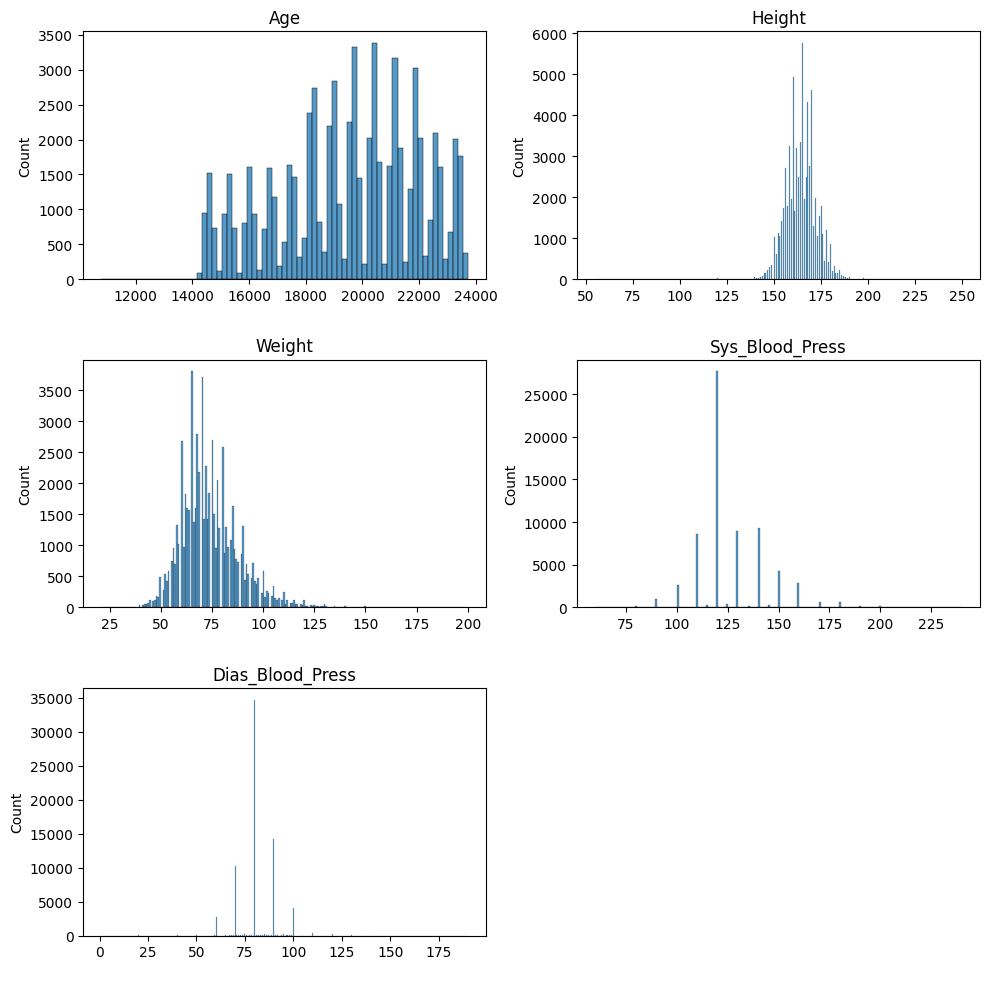

In [26]:
#Show the histplot of numerical columns
plt.figure(figsize=(10,10))
for i in range (0, len(nums)):
    plt.subplot(3,2, i+1)
    sns.histplot(x=df_rev1[nums[i]])
    plt.title(nums[i], loc='Center')
    plt.xlabel(nums[i], color='w')
    plt.tight_layout()

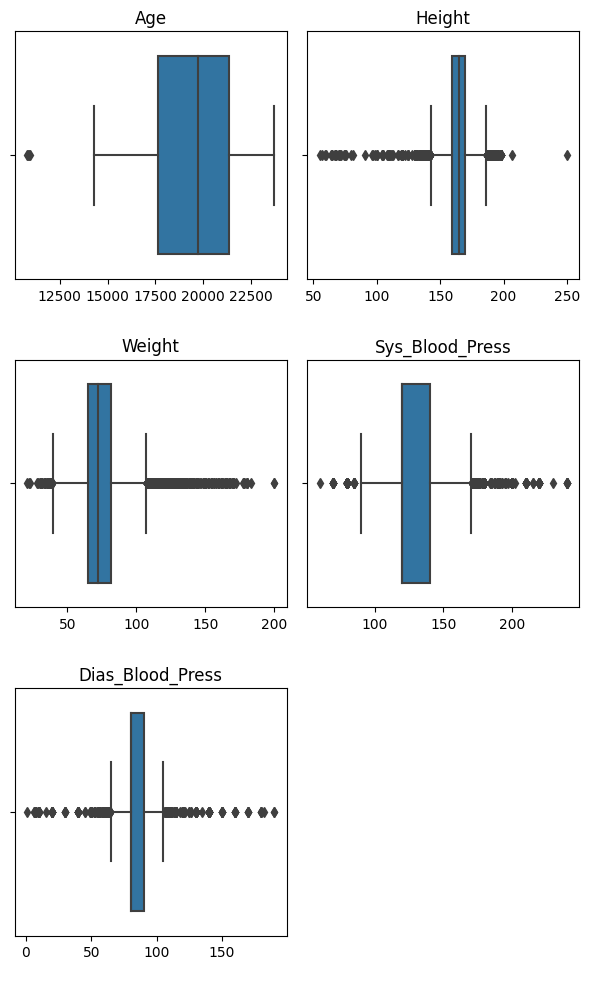

In [27]:
#Show the boxplot each Numerical column
plt.figure(figsize=(6,10))
for i in range (0, len(nums)):
    plt.subplot(3,2, i+1)
    sns.boxplot(x=df_rev1[nums[i]])
    plt.title(nums[i], loc='Center')
    plt.xlabel(nums[i], color='w')
    plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

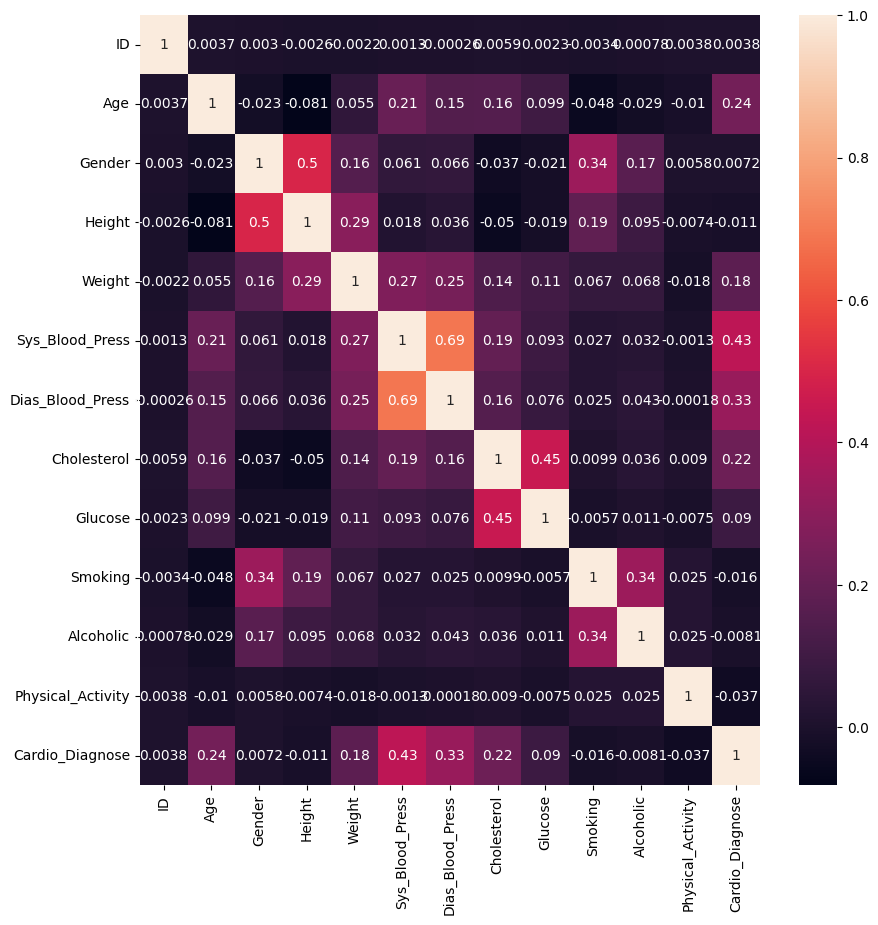

In [30]:
#Get variabel contains correlation value each 2 columns
Correlation = df_rev1.corr()

#Show the heat map table of correlation
plt.figure(figsize=(10,10))
sns.heatmap(Correlation, annot=True)
plt.show

In [31]:
df_rev2 = df_rev1.copy()

#Make a One Hot Encoding on Gender column
Map_Gender = {1:'Female',
              2:'Male'}
df_rev2['Gender_A'] = df_rev2['Gender'].map(Map_Gender)
df_rev2

,ID,Age,Gender,Height,Weight,Sys_Blood_Press,Dias_Blood_Press,Cholesterol,Glucose,Smoking,Alcoholic,Physical_Activity,Cardio_Diagnose,Gender_A
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,Male
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,Female
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,Female
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,Male
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68811,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,Male
68812,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,Female
68813,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,Male
68814,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,Female


In [32]:
#Make a One Hot Encoding on 'Gender_After' column
df_rev2 = df_rev2.join(pd.get_dummies(df_rev2[['Gender_A']]))

#Drop 'Gender_After' column
df_rev2 = df_rev2.drop(['Gender_A','Gender'], axis='columns', inplace=False)

df_rev2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68816 entries, 0 to 68815
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 68816 non-null  int64  
 1   Age                68816 non-null  int64  
 2   Height             68816 non-null  int64  
 3   Weight             68816 non-null  float64
 4   Sys_Blood_Press    68816 non-null  int64  
 5   Dias_Blood_Press   68816 non-null  int64  
 6   Cholesterol        68816 non-null  int64  
 7   Glucose            68816 non-null  int64  
 8   Smoking            68816 non-null  int64  
 9   Alcoholic          68816 non-null  int64  
 10  Physical_Activity  68816 non-null  int64  
 11  Cardio_Diagnose    68816 non-null  int64  
 12  Gender_A_Female    68816 non-null  uint8  
 13  Gender_A_Male      68816 non-null  uint8  
dtypes: float64(1), int64(11), uint8(2)
memory usage: 6.4 MB


In [33]:
#Get the Max and Min value basen on Age, Weight, and Weight
Summary_df = pd.DataFrame({'Category' : ['Max Age (year)','Min Age (year)',
                                         'Max Weight','Min Weight',
                                         'Max Height','Min Height'],
                           'Values' : [((df_rev2['Age'].max())/365).round(2),((df_rev2['Age'].min())/365).round(2),
                                        df_rev2['Weight'].max().round(),df_rev2['Weight'].min().round(),
                                        df_rev2['Height'].max().round(),df_rev2['Height'].min().round()]
                         })
Summary_df = Summary_df.style.set_caption('Max and Min Value on Age, Weight, and Weight')
Summary_df

,Category,Values
0,Max Age (year),64.970000
1,Min Age (year),29.580000
2,Max Weight,200.000000
3,Min Weight,21.000000
4,Max Height,250.000000
5,Min Height,55.000000


In [34]:
#Drop column ID because there is identity each row and no need on Machine Learning
df_rev2 = df_rev2.drop(['ID'], axis='columns', inplace=False)
df_rev2.head()

,Age,Height,Weight,Sys_Blood_Press,Dias_Blood_Press,Cholesterol,Glucose,Smoking,Alcoholic,Physical_Activity,Cardio_Diagnose,Gender_A_Female,Gender_A_Male
0,18393,168,62.0,110,80,1,1,0,0,1,0,0,1
1,20228,156,85.0,140,90,3,1,0,0,1,1,1,0
2,18857,165,64.0,130,70,3,1,0,0,0,1,1,0
3,17623,169,82.0,150,100,1,1,0,0,1,1,0,1
4,17474,156,56.0,100,60,1,1,0,0,0,0,1,0


In [35]:
#Create a variable X (target) and Y (feature)
X = df_rev2.drop(['Cardio_Diagnose'], axis=1)
Y = df_rev2['Cardio_Diagnose']

#Split the X and Y dataframe into train and test dataframes each other
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [36]:
# Logistic Regression
Log_Reg = linear_model.LogisticRegression()
Log_Reg.fit(X_train,Y_train)
Pred_Log_Reg = Log_Reg.predict(X_test)

# Random Forest Classifier
Rand_Forest = RandomForestClassifier(random_state=42)
Rand_Forest.fit(X_train, Y_train)
Pred_Rand_Forest = Rand_Forest.predict(X_test)

# Decision Tree Classifier
Dec_Tree = DecisionTreeClassifier(random_state=42)
Dec_Tree.fit(X_train,Y_train)
Pred_Dec_Tree = Dec_Tree.predict(X_test)

# ExtraTreesClassifier
Extra_Tree = ExtraTreesClassifier()
Extra_Tree.fit(X_train, Y_train)
Pred_Extra_Tree = Extra_Tree.predict(X_test)

# Gradient Boosting
Grad_Boost = GradientBoostingClassifier()
Grad_Boost.fit(X_train, Y_train)
Pred_Grad_Boost = Grad_Boost.predict(X_test)

# Light Gradient Boosting
Light_Grad_Boost = LGBMClassifier()
Light_Grad_Boost.fit(X_train, Y_train)
Pred_Light_Grad_Boost = Light_Grad_Boost.predict(X_test)

# Hist Gradient Boosting
Hist_Grad_Boost = HistGradientBoostingClassifier(random_state=42)
Hist_Grad_Boost.fit(X_train,Y_train)
Pred_Hist_Grad_Boost = Hist_Grad_Boost.predict(X_test)

[LightGBM] [Info] Number of positive: 27241, number of negative: 27811
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 55052, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494823 -> initscore=-0.020708
[LightGBM] [Info] Start training from score -0.020708


In [37]:
#Make a table, contain the Model result
Model_Res = pd.DataFrame({'Model' : ['Logistic_Regression','Random_Forest','Decision_Tree','Extra_Trees',
                                     'Gradient_Boosting','Light_Gradient_Boosting','Hist_Gradient_Boosting'],
                          'Recall' : [recall_score(Y_test, Pred_Log_Reg),recall_score(Y_test,Pred_Rand_Forest),
                                      recall_score(Y_test,Pred_Dec_Tree),recall_score(Y_test,Pred_Extra_Tree),
                                      recall_score(Y_test,Pred_Grad_Boost),recall_score(Y_test,Pred_Light_Grad_Boost),
                                      recall_score(Y_test,Pred_Hist_Grad_Boost)],
                          'AUC' : [roc_auc_score(Y_test, Pred_Log_Reg),roc_auc_score(Y_test,Pred_Rand_Forest),
                                   roc_auc_score(Y_test,Pred_Dec_Tree),roc_auc_score(Y_test,Pred_Extra_Tree),
                                   roc_auc_score(Y_test,Pred_Grad_Boost),roc_auc_score(Y_test,Pred_Light_Grad_Boost),
                                   roc_auc_score(Y_test,Pred_Hist_Grad_Boost)],
                        'F1 Score':[f1_score(Y_test, Pred_Log_Reg),f1_score(Y_test,Pred_Rand_Forest),
                                    f1_score(Y_test,Pred_Dec_Tree),f1_score(Y_test,Pred_Extra_Tree),
                                    f1_score(Y_test,Pred_Grad_Boost),f1_score(Y_test,Pred_Light_Grad_Boost),
                                    f1_score(Y_test,Pred_Hist_Grad_Boost)],
                         'Accuracy':[accuracy_score(Y_test, Pred_Log_Reg),accuracy_score(Y_test,Pred_Rand_Forest),
                                     accuracy_score(Y_test,Pred_Dec_Tree),accuracy_score(Y_test,Pred_Extra_Tree),
                                     accuracy_score(Y_test,Pred_Grad_Boost),accuracy_score(Y_test,Pred_Light_Grad_Boost),
                                     accuracy_score(Y_test,Pred_Hist_Grad_Boost)]
                        })
Model_Res = Model_Res.style.set_caption('Baseline Modelling Performance')
Model_Res

,Model,Recall,AUC,F1 Score,Accuracy
0,Logistic_Regression,0.649252,0.707719,0.687864,0.708297
1,Random_Forest,0.694306,0.712908,0.705540,0.713092
2,Decision_Tree,0.633989,0.634045,0.631717,0.634045
3,Extra_Trees,0.697975,0.704527,0.700545,0.704592
4,Gradient_Boosting,0.689169,0.733937,0.719804,0.734380
5,Light_Gradient_Boosting,0.687115,0.733629,0.718980,0.734089
6,Hist_Gradient_Boosting,0.689463,0.734084,0.720000,0.734525


In [48]:
#Try to do a Hyperparameter Tunning From Best Baseline Modelling

#Split dataframe
X_HT = df_rev2.drop(['Cardio_Diagnose'], axis=1).to_numpy()
Y_HT = df_rev2['Cardio_Diagnose'].to_numpy()
Y_HT = Y_HT.reshape(len(Y_HT),)

X_Train_HT, X_Test_HT, Y_Train_HT, Y_Test_HT = train_test_split(X_HT, Y_HT, test_size=0.20, random_state=42)

#Import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Estimated The parameter on Hyperparameter Tunning
parameters = {'n_estimators': (10,20,30,40,50),
              'max_depth':(1,2,3,4,5)}

#Use recall on Hyperparameter Tunning
Rand_Forest_RanCV = RandomizedSearchCV(Rand_Forest, parameters, cv=5, scoring='recall')
Rand_Forest_RanCV.fit(X_Train_HT, Y_Train_HT)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5),
                                        'n_estimators': (10, 20, 30, 40, 50)},
                   scoring='recall')

In [49]:
# results of RandomSearchCV
CV_Result = pd.DataFrame(Rand_Forest_RanCV.cv_results_)
Retain_Column = ['params','mean_test_score','rank_test_score']
CV_Result[Retain_Column].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
5,"{'n_estimators': 30, 'max_depth': 4}",0.655483,1
7,"{'n_estimators': 40, 'max_depth': 4}",0.653757,2
0,"{'n_estimators': 30, 'max_depth': 3}",0.651812,3
9,"{'n_estimators': 50, 'max_depth': 5}",0.650967,4
1,"{'n_estimators': 20, 'max_depth': 3}",0.633824,5
8,"{'n_estimators': 30, 'max_depth': 2}",0.623913,6
3,"{'n_estimators': 30, 'max_depth': 1}",0.607871,7
6,"{'n_estimators': 10, 'max_depth': 3}",0.595316,8
2,"{'n_estimators': 40, 'max_depth': 1}",0.589406,9
4,"{'n_estimators': 10, 'max_depth': 2}",0.520832,10


In [50]:
# classification report
from sklearn.metrics import classification_report
Y_Pred_HT = Rand_Forest_RanCV.best_estimator_.predict(X_Test_HT)
print(classification_report(Y_Test_HT, Y_Pred_HT))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74      6950
           1       0.76      0.65      0.70      6814

    accuracy                           0.72     13764
   macro avg       0.73      0.72      0.72     13764
weighted avg       0.73      0.72      0.72     13764



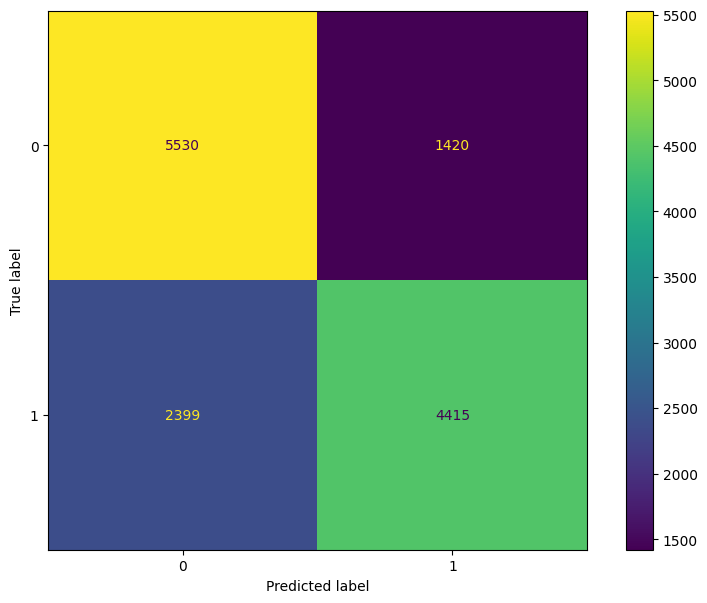

In [53]:
# The confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

ConMat_HT = confusion_matrix(Y_Test_HT, Y_Pred_HT, labels=Rand_Forest_RanCV.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=ConMat_HT,
                             display_labels=Rand_Forest_RanCV.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

<Figure size 1500x1000 with 0 Axes>

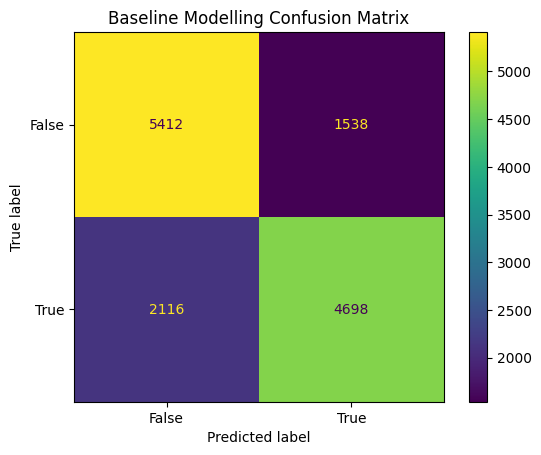

In [52]:
#Count the Confusion Matrix value Based on choosen model
Matrix_Hist_Grad_Boost = metrics.confusion_matrix(Y_test, Pred_Hist_Grad_Boost)
ConMat_Display_Hist_Grad_Boost = metrics.ConfusionMatrixDisplay(confusion_matrix = Matrix_Hist_Grad_Boost,
                                                           display_labels = [False, True])

#Show Confusion Matrix
plt.figure(figsize=(15,10))
ConMat_Display_Hist_Grad_Boost.plot()
plt.title('Baseline Modelling Confusion Matrix')
plt.show()

In [ ]:
#Get the feature importance value
Grad_Boost.feature_importances_

array([1.30441254e-01, 2.79909209e-03, 1.87327852e-02, 7.38897727e-01,
       1.92184757e-02, 7.67354819e-02, 3.19302490e-03, 2.80306953e-03,
       1.26138746e-03, 4.96855705e-03, 6.85051432e-04, 2.64093906e-04])

Text(0.5, 1.0, 'Best Modelling Feature Importance')

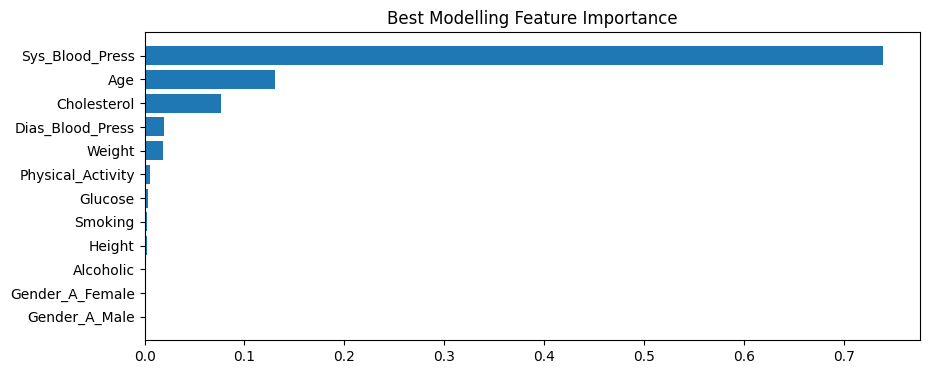

In [ ]:
#Show the feature importance, and sort it too
feature_importance = Grad_Boost.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 4))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Best Modelling Feature Importance')

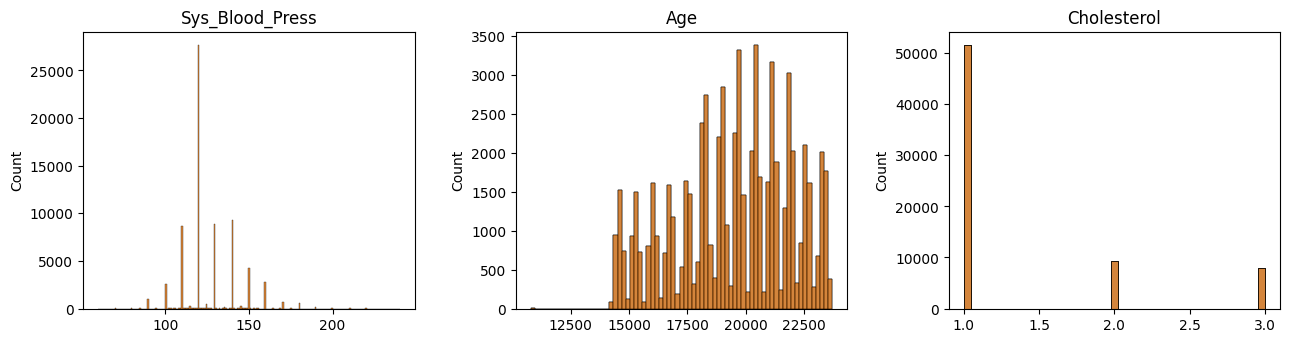

In [ ]:
#Get Dataframe just with positive 'Cardio_Diagnose'
df_Positive = df_rev1[df_rev1['Cardio_Diagnose'] == 1 ]

#Make the array, which it contains columns with high point on feature importance
Importance_Feature = ['Sys_Blood_Press','Age','Cholesterol']

#
plt.figure(figsize=(13,10))
for a in range (0, len(Importance_Feature)):
    plt.subplot(3, 3, a+1)
    sns.histplot(x=df_rev1[Importance_Feature[a]])
    plt.title(Importance_Feature[a], loc='Center')
    plt.xlabel(Importance_Feature[a], color='w')
    plt.tight_layout()
    ax1 = sns.histplot(x=df_rev1[Importance_Feature[a]])
    ax1.bar_label(ax1.containers[0])

In [ ]:
#Get the mean on Age and Sys_Blood_Press of only positive respondents divided by level on Cholesterol
df_Pos_Cholesterol = df_Positive.copy()
Cholesterol_Map = {1:'Normal',
                   2:'Below_Normal',
                   3:'High'}

df_Pos_Cholesterol['Cholesterol_M'] = df_Pos_Cholesterol['Cholesterol'].map(Cholesterol_Map)

df_Pos_Cholesterol.groupby(['Cholesterol','Cholesterol_M'])['Age','Sys_Blood_Press'].mean().round(2)

,,Age,Sys_Blood_Press
Cholesterol,Cholesterol_M,,
1,Normal,19954.34,132.47
2,Below_Normal,19878.73,137.56
3,High,20628.66,135.36


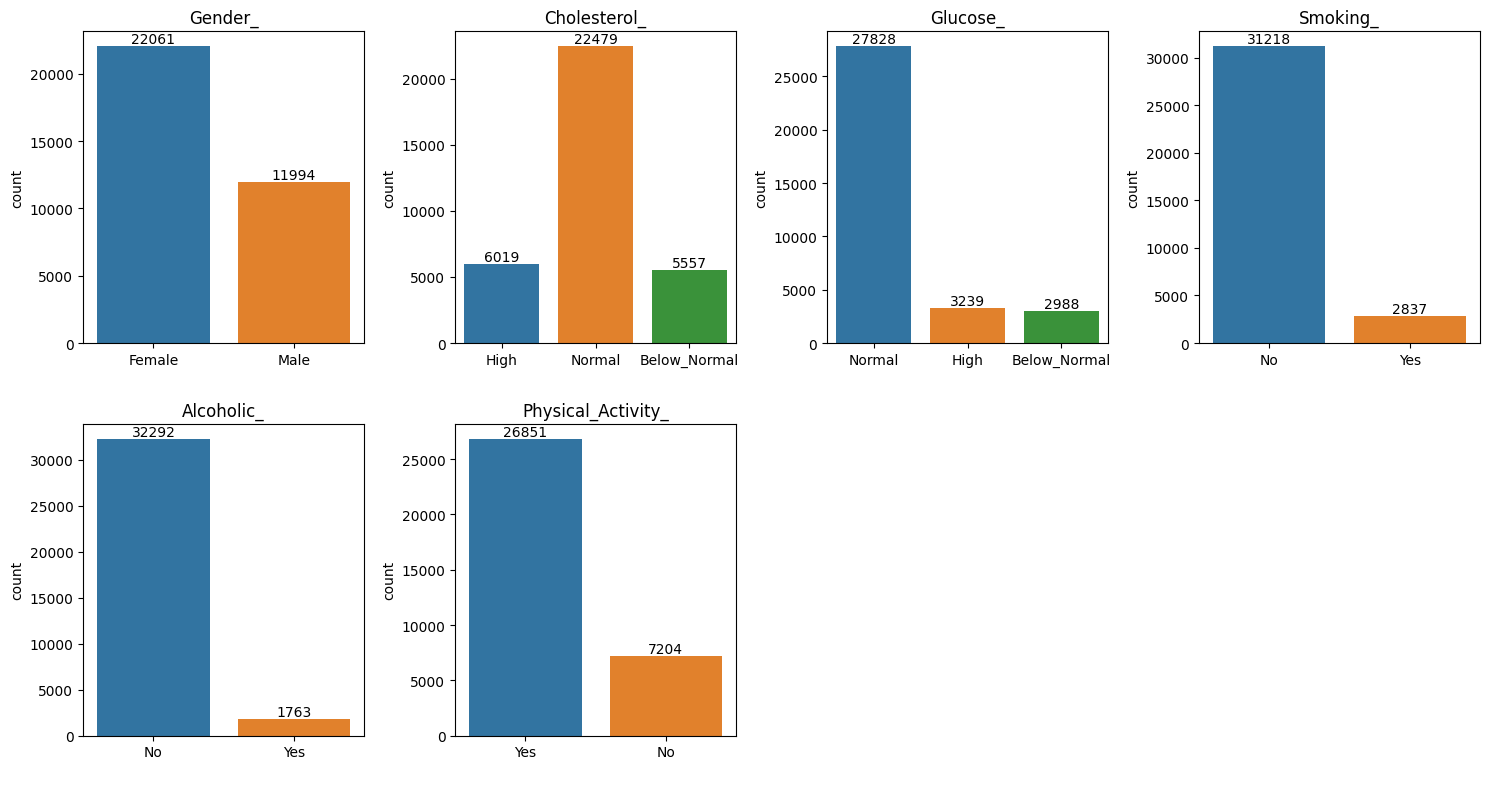

In [ ]:
df_P_Group = df_rev1.copy()

#Make a Label Encoding on some columns
Map_Gender_ = {1:'Female',
               2:'Male'}
df_P_Group['Gender_'] = df_P_Group['Gender'].map(Map_Gender_)
Map_Cholesterol_ = {1:'Normal',
                    2:'Below_Normal',
                    3:'High'}
df_P_Group['Cholesterol_'] = df_P_Group['Cholesterol'].map(Map_Cholesterol_)
Map_Glucose_ = {1:'Normal',
                2:'Below_Normal',
                3:'High'}
df_P_Group['Glucose_'] = df_P_Group['Glucose'].map(Map_Glucose_)
Map_Smoking_ = {0:'No',
                1:'Yes'}
df_P_Group['Smoking_'] = df_P_Group['Smoking'].map(Map_Smoking_)
Map_Alcoholic_ = {0:'No',
                  1:'Yes'}
df_P_Group['Alcoholic_'] = df_P_Group['Alcoholic'].map(Map_Alcoholic_)
Map_Physical_Activity_ = {0:'No',
                          1:'Yes'}
df_P_Group['Physical_Activity_'] = df_P_Group['Physical_Activity'].map(Map_Physical_Activity_)

#Drop the existing columns before Labelling, and get just with positive respondents
df_P_Group = df_P_Group.drop(['Gender','Cholesterol','Glucose','Smoking','Physical_Activity'],axis='columns', inplace=False)
df_P_Group = df_P_Group[df_P_Group['Cardio_Diagnose'] == 1]

cats_n = ['Gender_','Cholesterol_','Glucose_','Smoking_','Alcoholic_','Physical_Activity_']
df_P_Group

plt.figure(figsize=(15,8))
for b in range (0, len(cats_n)):
    plt.subplot(2, 4, b+1)
    sns.countplot(x=df_P_Group[cats_n[b]])
    plt.title(cats_n[b], loc='Center')
    plt.xlabel(cats_n[b], color='w')
    plt.tight_layout()
    ax = sns.countplot(x=df_P_Group[cats_n[b]])
    ax.bar_label(ax.containers[0])

In [ ]:
#Get the Max and Min value based on Age, Weight, Cholesterol, Systole, and Diastole on positive respondents
Summary_df_p = pd.DataFrame({'Category' : ['Age (year)','Weight','Cholesterol','Systole','Diastole'],
                           'Max Values' : [((df_Positive['Age'].max())/365).round(2),
                                           df_Positive['Weight'].max(),
                                           df_Positive['Cholesterol'].max(),
                                           df_Positive['Sys_Blood_Press'].max(),
                                           df_Positive['Dias_Blood_Press'].max()],
                           'Min Values' : [((df_Positive['Age'].min())/365).round(2),
                                           df_Positive['Weight'].min(),
                                           df_Positive['Cholesterol'].min(),
                                           df_Positive['Sys_Blood_Press'].min(),
                                           df_Positive['Dias_Blood_Press'].min()]
                             })
Summary_df_p = Summary_df_p.style.set_caption('Max and Min Value on Age, Weight, Cholesterol, Systole, and Diastole by Positive Respondents')
Summary_df_p

,Category,Max Values,Min Values
0,Age (year),64.970000,39.110000
1,Weight,200.000000,21.000000
2,Cholesterol,3.000000,1.000000
3,Systole,240.000000,70.000000
4,Diastole,190.000000,8.000000
